In [221]:
%matplotlib
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
import math, gillespy2
from gillespy2.basic_tau_hybrid_solver import BasicTauHybridSolver

Using matplotlib backend: Qt5Agg


In [222]:
class DayModel(gillespy2.Model):
    def __init__(self, parameter_values=None, init_v=0):
        # initialize
        gillespy2.Model.__init__(self, name="Macrophage")
        
        # species
        S_ = gillespy2.Species(name='S_', initial_value=1e6)
        M_ = gillespy2.Species(name='M_', initial_value=1e6)
        H_ = gillespy2.Species(name='H_', initial_value=0)
        
        self.add_species([S_,M_,H_])
        
        # parameters
        k2 = gillespy2.Parameter(name='k2', expression=4.333e-10)
        k3 = gillespy2.Parameter(name='k3', expression=0)
        Sa = gillespy2.Parameter(name='Sa_', expression=0)
        MuA = gillespy2.Parameter(name='MuA', expression=0)
        ns = gillespy2.Parameter(name='ns', expression=3) # avg = 3.38
        
        self.add_parameter([k2,k3,Sa,ns,MuA])
        
        # reactions
        r1 = gillespy2.Reaction(name='r1', reactants={S_:int(ns.expression),M_:1}, products={H_:1},
                               propensity_function="(k2*S_*M_)/ns")
        
        r2 = gillespy2.Reaction(name='r2', reactants={}, products = {M_:1},
                                rate=Sa)
        
        r3 = gillespy2.Reaction(name='r3', reactants={M_:1}, products = {},
                                rate=MuA)
        
        r4 = gillespy2.Reaction(name='r4', reactants={H_:1}, products = {},
                                rate=k3)
        
        self.add_reaction([r1,r2,r3,r4])
        t = numpy.linspace(0,3600,361)
        self.timespan(t)
        # print(t)

In [223]:
model = DayModel()

In [224]:
%time results = model.run(solver=BasicTauHybridSolver())

Wall time: 306 ms


0.800436


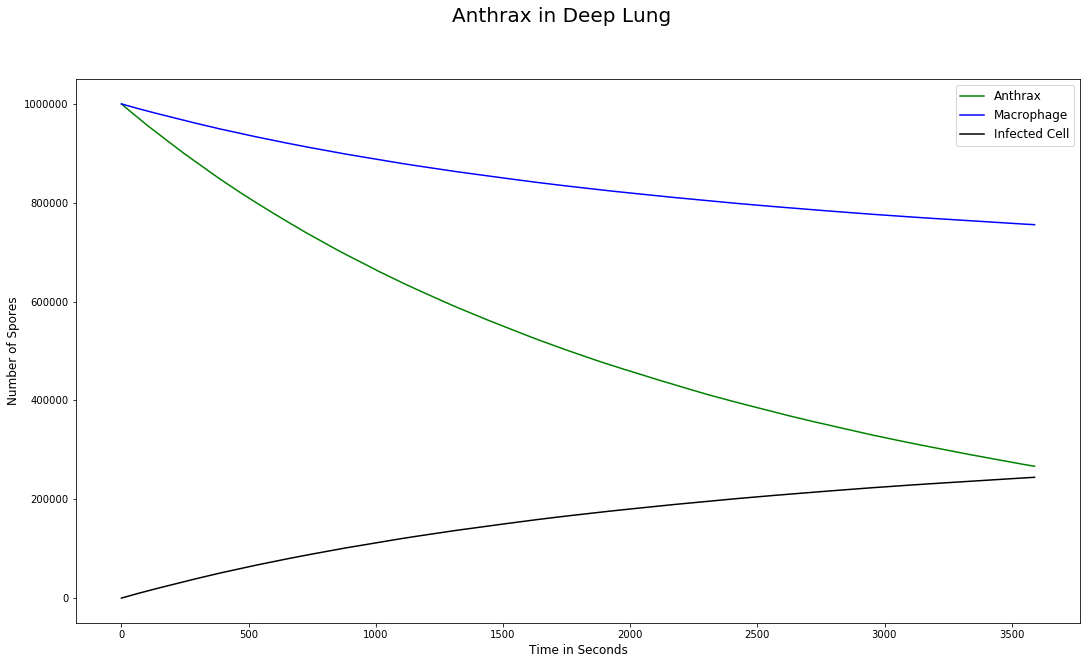

In [225]:
fig = plt.figure(figsize=(18,10))
fig.suptitle("Anthrax in Deep Lung", fontsize=20)
plt.plot(results['time'], results['S_'], 'g-', label='Anthrax')
plt.plot(results['time'], results['M_'], 'b-', label='Macrophage')
plt.plot(results['time'], results['H_'], 'k-', label='Infected Cell')
plt.xlabel("Time in Seconds", fontsize=12)
plt.ylabel("Number of Spores", fontsize=12)
plt.legend(loc='best', fontsize=12)
print(results['S_'][-1]/(results['S_'][0]/int(model.listOfParameters['ns'].expression)))


